In [1]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chrome_options)
# Query to obtain links
query = 'Ria Ricis'
#links = [] # Initiate empty list to capture final results
# Specify number of pages on google search, each page contains 10 #links
n_pages = 10

for page in range(1, n_pages):
    url = "http://www.google.com/search?q=" + query + "&start=" + str((page - 1) * 10)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    # soup = BeautifulSoup(r.text, 'html.parser')
    
    search = soup.find_all('div', class_="yuRUbf")
    for h in search:
        #links.append(h.a.get('href'))
        print(h.a.text)
        print(h.a.get('href'))

C:\Users\fadli\AppData\Local\Temp\ipykernel_15544\3296139365.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chrome_options)
C:\Users\fadli\AppData\Local\Temp\ipykernel_15544\3296139365.py:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chrome_options)


WebDriverException: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: headless chrome=110.0.5481.177)
Stacktrace:
Backtrace:
	(No symbol) [0x004237D3]
	(No symbol) [0x003B8B81]
	(No symbol) [0x002BB36D]
	(No symbol) [0x002B772D]
	(No symbol) [0x002ADC65]
	(No symbol) [0x002AF033]
	(No symbol) [0x002ADF02]
	(No symbol) [0x002AD324]
	(No symbol) [0x002AD241]
	(No symbol) [0x002ABC95]
	(No symbol) [0x002AC518]
	(No symbol) [0x002BCF4C]
	(No symbol) [0x00321E01]
	(No symbol) [0x0030B41C]
	(No symbol) [0x00321215]
	(No symbol) [0x0030B216]
	(No symbol) [0x002E0D97]
	(No symbol) [0x002E253D]
	GetHandleVerifier [0x0069ABF2+2510930]
	GetHandleVerifier [0x006C8EC1+2700065]
	GetHandleVerifier [0x006CC86C+2714828]
	GetHandleVerifier [0x004D3480+645344]
	(No symbol) [0x003C0FD2]
	(No symbol) [0x003C6C68]
	(No symbol) [0x003C6D4B]
	(No symbol) [0x003D0D6B]
	BaseThreadInitThunk [0x75127D69+25]
	RtlInitializeExceptionChain [0x76F8BB9B+107]
	RtlClearBits [0x76F8BB1F+191]


In [ ]:
!python selenium-search-url.py > hasil-search-url.txt

In [ ]:
from selenium import webdriver
import requests
import sys, getopt
import argparse
from webdriver_manager.chrome import ChromeDriverManager

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chrome_options)
full_text=[]

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('-i', '--infile', default='', help='input filename')
    parser.add_argument('-o', '--outfile', default='', help='output filename')
    return parser.parse_args()

def main():
    args = parse_args()
    outfile = args.outfile
    infile = args.infile
    
    with open(infile) as f:
        content = f.read().splitlines()
    f.close()
    
    f = open(outfile, "w")
    for u in content:
        driver.get(u)
        elems = driver.find_element_by_tag_name('body').text
        full_text.append(elems)
    print(full_text)
    
    f.write(str(full_text))
    
    # print(full_text)
    driver.close()
    f.close()
main()

In [ ]:
!python selenium-browse-url.py -i hasil-search-url.txt -o hasil-browse-url.txt

In [ ]:
import requests
from bs4 import BeautifulSoup

# membuat permintaan ke halaman pencarian Google

url = f"https://www.instagram.com/riaricis1795/?hl=id"
response = requests.get(url)

# parsing halaman HTML dengan BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# mencari elemen HTML yang mengandung judul tautan
titles = soup.find_all("h3")

# menyimpan judul tautan dalam file txt
with open("output.txt", "w") as file:
    for title in titles:
        file.write(title.get_text() + "\n")

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import os

# membuat permintaan ke halaman Wikipedia
url = "https://www.instagram.com/riaricis1795/?hl=id"
response = requests.get(url)

# parsing halaman HTML dengan BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# mencari semua elemen HTML yang mengandung teks pada halaman
text_elements = soup.find_all(text=True)

# membersihkan teks dari karakter yang tidak diinginkan
text = re.sub(r'\[[0-9]+\]', '', text) # hapus tautan
text = re.sub(r'\s+', ' ', text) # hapus karakter spesial dan spasi berlebih
text = re.sub(r'\W+', ' ', text) # hapus tanda baca

# menghapus elemen HTML yang kosong
cleaned_text = list(filter(None, cleaned_text))

# menggabungkan semua teks menjadi satu kesatuan
text = " ".join(cleaned_text)

# menuliskan teks ke dalam file teks
with open("hasilnya.txt", "w", encoding="utf-8") as file:
    file.write(text)

### Tugas

In [4]:
!pip install newspaper3k

In [5]:
from newspaper import Article # digunakan untuk mengimpor class Article dari library newspaper

article = Article('https://www.jawapos.com/entertainment/infotainment/19/11/2022/setahun-pernikahan-ria-ricis-teuku-ryan-bersama-menghadapi-cobaan/','id')
# mendefinisikan article dengan class Article dengan parameter pertama adalah link yang discraping dan parameter yang kedua adalah kode bahasa yang digunakan untuk mengurai artikel
article.download()
# digunakan untuk download web yang berisi artikel 
article.parse()
# untuk mengurai halaman web yang sudah didownload

print("Judul Artikel : ", article.title) # memunculkan output judul artikel
print("Author : ", article.authors) # memunculkan output penulis artikel
print("ISI ARTIKEL : \n", article.text) # memunculkan isi artikel

Judul Artikel :  Setahun Pernikahan, Ria Ricis-Teuku Ryan Bersama Menghadapi Cobaan
Author :  []
ISI ARTIKEL : 
 JawaPos.com– Sejak 12 November 2022 lalu, usia pernikahan Ria Ricis dan Teuku Ryan genap mencapai 1 tahun. Pasangan yang sudah dianugerahi satu orang anak ini kemudian menggelar perayaan wedding anniversary di bilangan Kemang Jakarta Selatan, Sabtu (19/11), dengan dihadiri keluarga dan sejumlah sahabat.

Teuku Ryan dan Ria Ricis mengakui bahwa dalam satu tahun pernikahan, mereka tidak luput dari badai cobaan. Misalnya saja dimunculkan gosip tak sedap tentang video syur yang dikaitkan dengan Teuku Ryan setelah muncul nama inisial R. Juga dimuncul rumor tak sedap soal TR numpang hidup ke Ria Ricis padahal faktanya dia juga bekerja di dunia hiburan dan memiliki penghasilan sendiri.

Di tengah badai cobaan yang menimpa rumah tangganya, Ria Ricis dan Teuku Ryan menghadapi bersama. Mereka tidak terlalu memercayai gosip yang beredar di luar sana. Aebab mereka menerapkan rasa saling

In [6]:
from collections import Counter # untuk menghitung jumlah kemunculan setiap elemen pada sebuah iterable (seperti list, tuple, atau string)
import re  # berfungsi untuk memanipulasi string menggunakan ekspresi reguler
# regular expressions

article = article.text
article = article.lower() # digunakan agar tidak ada huruf kapital

# menggunakan fungsi re.sub() untuk subtitusi var string
article2 = re.sub(r"[^a-zA-Z\s]", "", article) 
bagi = article.split() # membuatnya menjadi list
frekuensi = Counter(bagi) # memberikan seberapa sering kata itu muncul

print('kata yang muncul lebih dari 5 kali akan disimpan ke dalam file ricis.txt')

with open("ricis.txt", "w") as file: # menyimpan hasil output dlm format .txt
    for kalimat in article2 : # menggunakan looping for
        file.write(f"{article2}\n") # menyimpan hasil cleaning 
        file.write(f"\n{frekuensi}\n") # menyimpan hasil dari pembagian per kata dalam list 
        break
    for kata,frekuensi in frekuensi.items():
        if frekuensi >= 5 : # apabila kata dalam list muncul lebih dari sama dengan 5 kali maka
            file.write(f"\n{kata}:{frekuensi} kali \n") # akan tersimpan dalam file .txt dan akan memunclkan berapa kali kata tersebut muncul

kata yang muncul lebih dari 5 kali akan disimpan ke dalam file ricis.txt


In [7]:
!pip install wordcloud

In [8]:
!pip install matplotlib

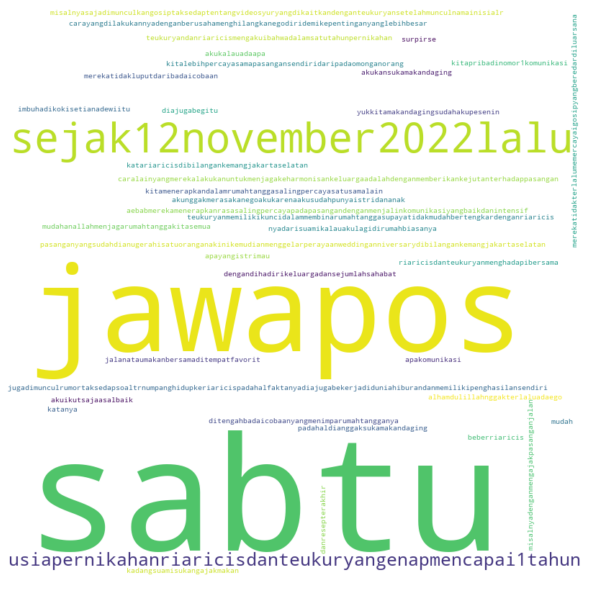

In [9]:
from wordcloud import WordCloud # library wordcloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # untuk memanipulasi gambar

teks = ''.join(bagi)
mask = np.array(Image.open("joj0.jpeg")) # memanipulasi gambar dgn array
def warna_frekuensi(word, font_size, position, orientation, random_state=None, **kwargs): # settings tampilan
    return tuple(np.random.randint(0, 255, 3))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(teks)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # menghilangkan bingkai pada library matplotlib
plt.tight_layout(pad = 0) # menyesuaikan layout agar tidak tumpang tindih sehingga dapat dibaca
  
plt.show()

In [24]:
daftar_data = bagi

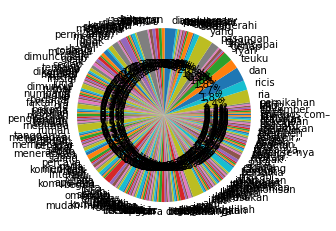

In [28]:
import matplotlib.pyplot as plt
count_data = Counter(daftar_data) 

# Mengambil nilai dan label dari setiap item pada dictionary count_data
values = count_data.values()
labels = count_data.keys()

# Membuat diagram lingkaran
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Menampilkan diagram
plt.show()

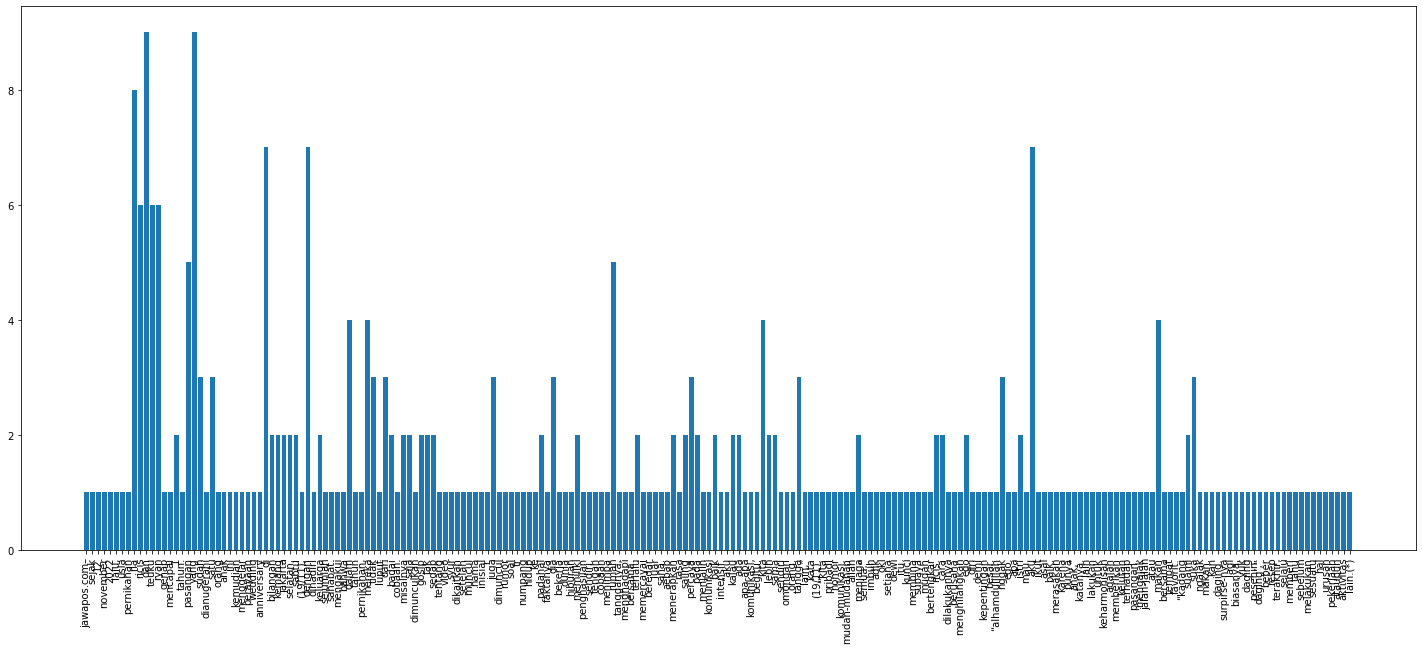

In [29]:
plt.figure(figsize=(25, 10)) # mengatur ukuran gambar
plt.rcParams.update({'font.size': 10}) # mengatur ukuran font
plt.bar(labels, values) 
plt.xticks(rotation=90) # mengatur agar font label x berotasi 90 derajat
plt.show() 

In [19]:
from newspaper import Article # digunakan untuk mengimpor class Article dari library newspaper

article = Article('https://www.cnnindonesia.com/hiburan/20230113124035-234-899976/ria-ricis-minta-maaf-soal-kisruh-moana-naik-jetski-jangan-ditiru','id')
# mendefinisikan article dengan class Article dengan parameter pertama adalah link yang discraping dan parameter yang kedua adalah kode bahasa yang digunakan untuk mengurai artikel
article.download()
# digunakan untuk download web yang berisi artikel 
article.parse()
# untuk mengurai halaman web yang sudah didownload

print("Judul Artikel : ", article.title) # memunculkan output judul artikel
print("Author : ", article.authors) # memunculkan output penulis artikel
print("ISI ARTIKEL : \n", article.text) # memunculkan isi artikel

Judul Artikel :  Ria Ricis Minta Maaf Soal Kisruh Moana Naik Jetski: Jangan Ditiru
Author :  ['Https', 'Www.Facebook.Com Cnnindonesia', 'Tim']
ISI ARTIKEL : 
 --

Ria Ricis meminta maaf usai membuat vlog dirinya dan Teuku Ryan membawa anak mereka yang berusia lima bulan, Moana, berbuah keributan di media sosial.

Dalam tayangan Rumpi No Secret Trans TV yang tayang pada Senin (9/1), Ria Ricis juga berterima kasih kepada seluruh pihak yang mengingatkan dirinya.

ADVERTISEMENT SCROLL TO RESUME CONTENT

"Kami terima kasih banget buat teman-teman yang sudah ingetin, maaf kalau ada salah, salah sih" katanya sembari tertawa. "Jadi, jangan ditiru,"

Ria Ricis mengakui keputusan dirinya membawa Moana naik jetski adalah hal yang salah. Ketika ditanya lebih lanjut oleh Feni Rose perihal kesalahan itu, Ria Ricis mengakui memang Moana belum waktunya naik jetski.

"Salah karena memang tidak sesuai dengan pada usia seperti yang tadi ada, tingginya juga tidak memadai, berat badannya, begitu sih, jadi 

In [20]:
from collections import Counter # untuk menghitung jumlah kemunculan setiap elemen pada sebuah iterable (seperti list, tuple, atau string)
import re  # berfungsi untuk memanipulasi string menggunakan ekspresi reguler
# regular expressions

article = article.text
article = article.lower() # digunakan agar tidak ada huruf kapital

# menggunakan fungsi re.sub() untuk subtitusi var string
article2 = re.sub(r"[^a-zA-Z\s]", "", article) 
bagi = article.split() # membuatnya menjadi list
frekuensi = Counter(bagi) # memberikan seberapa sering kata itu muncul

print('kata yang muncul lebih dari 5 kali akan disimpan ke dalam file ricis1.txt')

with open("ricis1.txt", "w") as file: # menyimpan hasil output dlm format .txt
    for kalimat in article2 : # menggunakan looping for
        file.write(f"{article2}\n") # menyimpan hasil cleaning 
        file.write(f"\n{frekuensi}\n") # menyimpan hasil dari pembagian per kata dalam list 
        break
    for kata,frekuensi in frekuensi.items():
        if frekuensi >= 5 : # apabila kata dalam list muncul lebih dari sama dengan 5 kali maka
            file.write(f"\n{kata}:{frekuensi} kali \n") # akan tersimpan dalam file .txt dan akan memunclkan berapa kali kata tersebut muncul

kata yang muncul lebih dari 5 kali akan disimpan ke dalam file ricis1.txt


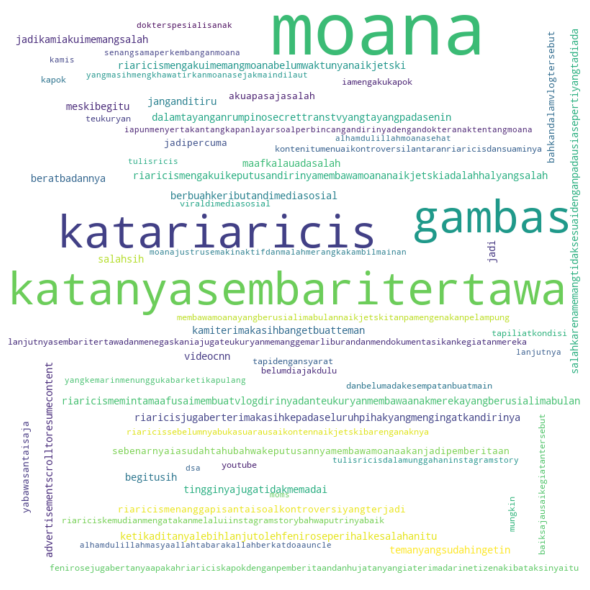

In [21]:
from wordcloud import WordCloud # library wordcloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # untuk memanipulasi gambar

teks = ''.join(bagi)
mask = np.array(Image.open("joj0.jpeg")) # memanipulasi gambar dgn array
def warna_frekuensi(word, font_size, position, orientation, random_state=None, **kwargs): # settings tampilan
    return tuple(np.random.randint(0, 255, 3))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(teks)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # menghilangkan bingkai pada library matplotlib
plt.tight_layout(pad = 0) # menyesuaikan layout agar tidak tumpang tindih sehingga dapat dibaca
  
plt.show()

In [31]:
daftar_data1 = bagi

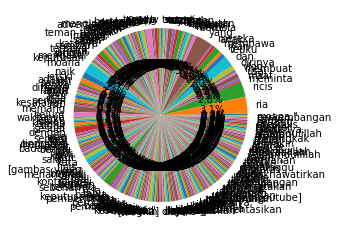

In [32]:
import matplotlib.pyplot as plt
count_data = Counter(daftar_data1) 

# Mengambil nilai dan label dari setiap item pada dictionary count_data
values = count_data.values()
labels = count_data.keys()

# Membuat diagram lingkaran
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Menampilkan diagram
plt.show()

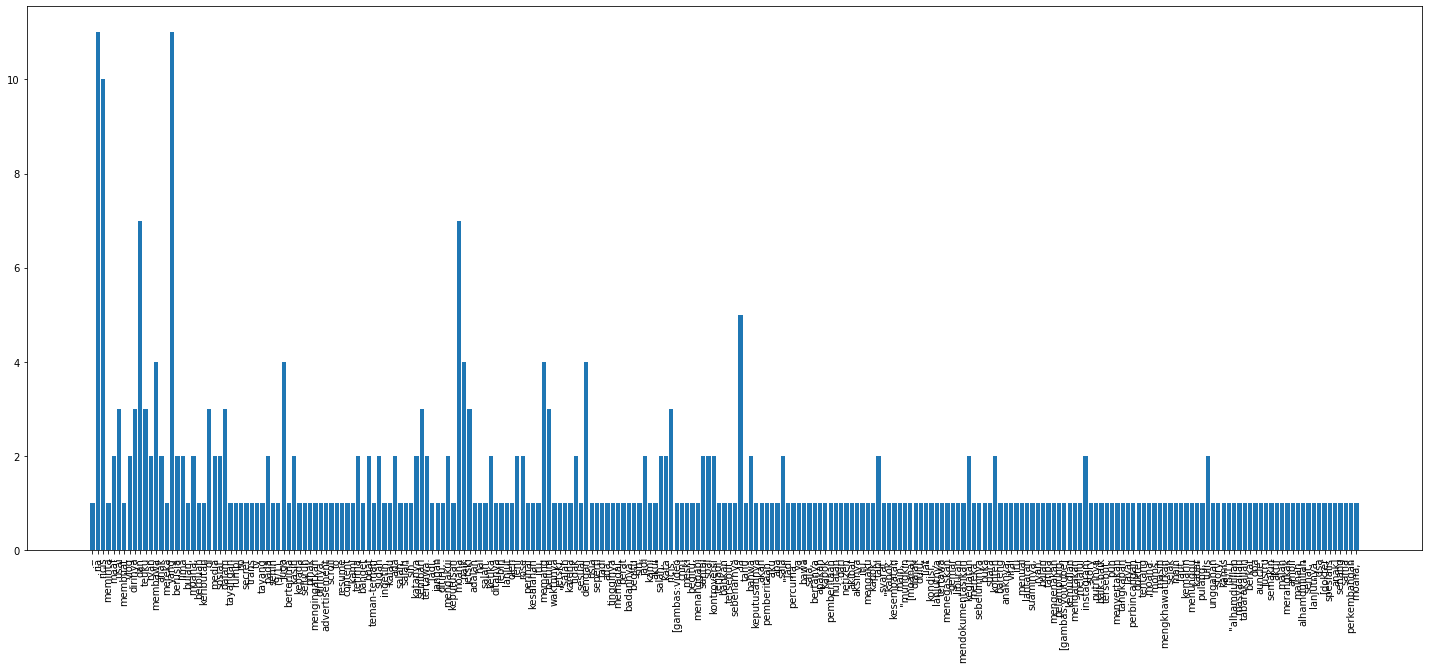

In [33]:
plt.figure(figsize=(25, 10)) # mengatur ukuran gambar
plt.rcParams.update({'font.size': 10}) # mengatur ukuran font
plt.bar(labels, values) 
plt.xticks(rotation=90) # mengatur agar font label x berotasi 90 derajat
plt.show() 